# CIFAR-10

### Import libraries

In [69]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers, regularizers

In [70]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Sanity check



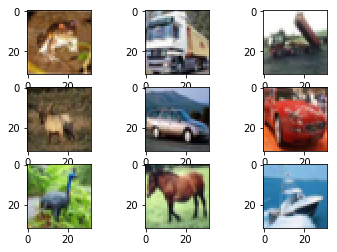

In [71]:
for i in range(3):
    for j in range(3):
        idx = i*3 + j + 1
        plt.subplot(3,3,idx)
        plt.imshow(X_train[idx-1])

### Basic Data Statistics

In [72]:
num_of_classes = np.unique(y_train).shape[0]
print("Number of training examples: ", X_train.shape[0])
print("Number of testing examples: ", X_test.shape[0])
print("Shape of input images: ", X_train.shape[1:])
print("Data type: ", X_train.dtype)
print("Number of classes: ", num_of_classes)

Number of training examples:  50000
Number of testing examples:  10000
Shape of input images:  (32, 32, 3)
Data type:  uint8
Number of classes:  10


### Pixel wise standardization

In [73]:
pixel_mean = X_train.mean(axis=0)
pixel_std = X_train.std(axis=0) + 1e-10 #prevents division by zero-error
# piwel-wise normalization on the train and test set
X_train = (X_train - pixel_mean) / pixel_std
X_test = (X_test - pixel_mean) / pixel_std


### To_categorical



In [74]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Change data shape

In [75]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

### Split data

In [76]:
seed = 7
np.random.seed(seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (40000, 32, 32, 3)
Validation set shape:  (10000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


#### Perform some data augmentation
Gjør mer av dette etterpå kanskje

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


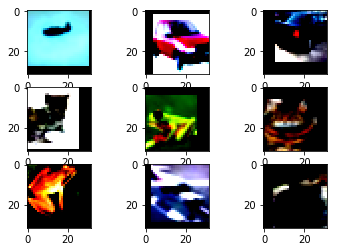

In [77]:
datagen = ImageDataGenerator(fill_mode='constant',
                             width_shift_range=0.2,
                            height_shift_range=0.2,
                             cval=0,
                            )

datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32,3))
    plt.show()
    break

## Build Model

In [78]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

#### Compile model

In [79]:
adam = keras.optimizers.Adam(lr=0.0003, epsilon=1e-8)

model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=['accuracy'],
             )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                102464    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
__________

#### Train the model on images with slight augmentation

In [80]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                   steps_per_epoch=len(X_train)/64,
                   epochs=20,
                   validation_data=(X_val, y_val),
                   verbose=1)


Epoch 1/20
625/625 [==============================] - 71s 114ms/step - loss: 1.9302 - acc: 0.2840 - val_loss: 1.5937 - val_acc: 0.4303
Epoch 2/20
625/625 [==============================] - 71s 113ms/step - loss: 1.7046 - acc: 0.3736 - val_loss: 1.4632 - val_acc: 0.4760
Epoch 3/20
625/625 [==============================] - 71s 113ms/step - loss: 1.5896 - acc: 0.4222 - val_loss: 1.3383 - val_acc: 0.5244
Epoch 4/20
625/625 [==============================] - 71s 113ms/step - loss: 1.5075 - acc: 0.4555 - val_loss: 1.2934 - val_acc: 0.5471
Epoch 5/20
625/625 [==============================] - 69s 111ms/step - loss: 1.4510 - acc: 0.4774 - val_loss: 1.2039 - val_acc: 0.5767
Epoch 6/20
625/625 [==============================] - 68s 108ms/step - loss: 1.3967 - acc: 0.4991 - val_loss: 1.1656 - val_acc: 0.5867
Epoch 7/20
625/625 [==============================] - 68s 108ms/step - loss: 1.3512 - acc: 0.5161 - val_loss: 1.1587 - val_acc: 0.5975
Epoch 8/20
625/625 [==============================] - 6

### Visualize and analyse

Fit tracks both loss and accuracy on training and validation set

#### Loss

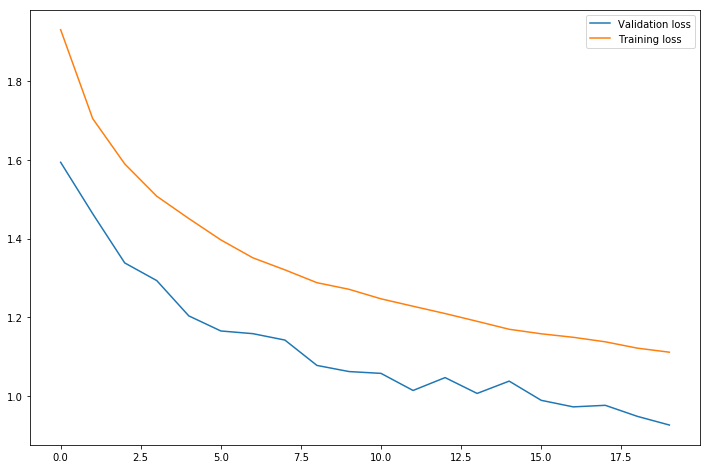

In [81]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.legend()

#### Accuracy

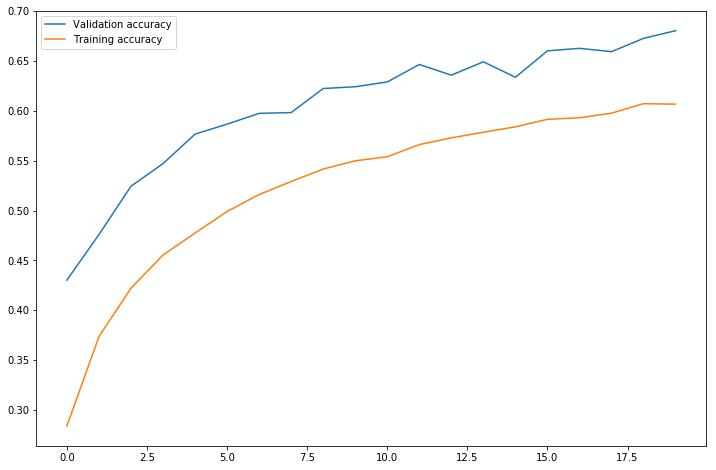

In [82]:
plt.figure(figsize=(12, 8))
plt.plot(history["val_acc"], label="Validation accuracy")
plt.plot(history["acc"], label="Training accuracy")

plt.legend()

### Evaluation on test set

In [83]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print("Test acc: ", test_acc)

10000/10000 [==============================] - 7s 676us/step
Test loss:  0.912150504398346
Test acc:  0.6791


#### Compare to previous plot

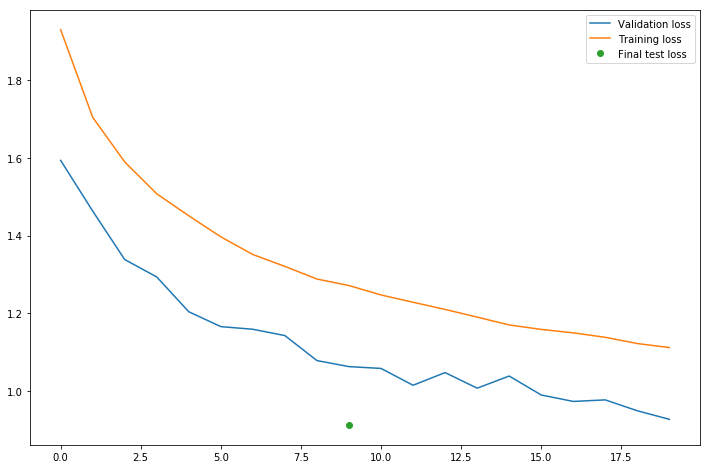

In [84]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.plot([9], [test_loss], 'o', label="Final test loss")
plt.legend()